In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import glob
import numpy as np
import pandas as pd
from PIL import Image
from zipfile import ZipFile
from matplotlib import pyplot as plt

In [3]:
import tensorflow as tf


In [4]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1/255.,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip = True,
    vertical_flip = True,
    validation_split = 0.2
)

train = datagen.flow_from_directory(
    '/content/drive/MyDrive/Cotton plant disease prediction/train',
    seed = 80,
    subset = 'training',
    batch_size = 32
)

valid = datagen.flow_from_directory(
    '/content/drive/MyDrive/Cotton plant disease prediction/val',
    seed = 80,
    subset = 'validation',
    batch_size = 32
)

Found 1562 images belonging to 4 classes.
Found 64 images belonging to 4 classes.


In [5]:
from tensorflow.keras.applications.vgg16 import VGG16
layer = tf.keras.layers.Input(shape=(None, None, 3))
vgg16 = VGG16(include_top=False, weights='imagenet', input_tensor=layer)

for layer in vgg16.layers:
    layer.trainable = False

x = tf.keras.layers.GlobalMaxPooling2D()(vgg16.output)
flatten = tf.keras.layers.Flatten()(x)
output = tf.keras.layers.Dense(4, activation='softmax')(flatten)

model = tf.keras.models.Model(inputs=vgg16.inputs, outputs=output)

58892288/58889256 [==============================] - 1s 0us/step


In [6]:
e_s = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=10, verbose=0)
checkpoint = tf.keras.callbacks.ModelCheckpoint('model_weights.hdf5', monitor='val_accuracy', mode='max', save_weights_only=True, verbose=0)

callbacks = [checkpoint, e_s]

In [7]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='CategoricalCrossentropy', metrics=['accuracy'])

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [9]:
history = model.fit(train, validation_data=valid, epochs=100, batch_size=64, callbacks=callbacks)

Epoch 1/100
49/49 [==============================] - 492s 9s/step - loss: 1.7474 - accuracy: 0.4014 - val_loss: 1.6510 - val_accuracy: 0.2500
Epoch 2/100
49/49 [==============================] - 32s 652ms/step - loss: 1.4404 - accuracy: 0.3771 - val_loss: 1.4718 - val_accuracy: 0.3125
Epoch 3/100
49/49 [==============================] - 32s 649ms/step - loss: 1.3881 - accuracy: 0.4104 - val_loss: 1.4352 - val_accuracy: 0.2969
Epoch 4/100
49/49 [==============================] - 32s 647ms/step - loss: 1.3198 - accuracy: 0.4398 - val_loss: 1.3682 - val_accuracy: 0.3594
Epoch 5/100
49/49 [==============================] - 32s 648ms/step - loss: 1.2614 - accuracy: 0.4738 - val_loss: 1.3931 - val_accuracy: 0.4062
Epoch 6/100
49/49 [==============================] - 32s 648ms/step - loss: 1.2143 - accuracy: 0.4910 - val_loss: 1.2607 - val_accuracy: 0.3750
Epoch 7/100
49/49 [==============================] - 32s 650ms/step - loss: 1.1647 - accuracy: 0.5250 - val_loss: 1.2212 - val_accuracy: 0

In [10]:
tf.keras.models.save_model(model,'vgg16.hdf5')

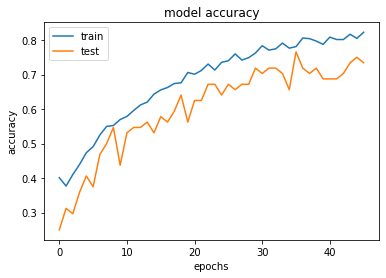

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

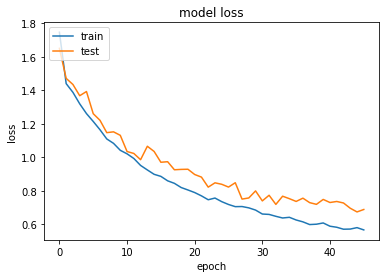

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()